In [1]:
import sys
import igraph
from igraph import Graph
import random
from IPython import display
from igraph import plot
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
random.seed(3)

### 1. Plot the clustering coefficient and the average shortest-path as a function of the parameter $p$ of the WS model.

We create the probability vector taking into account the fact that we are scaling it logarithmically later for the plot so the values should tend more towards 0 than towards 1.

In [14]:
p = [0, 0.0001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

We normalize both variables as indicated by the statement so that the resulting graph is better visualized.

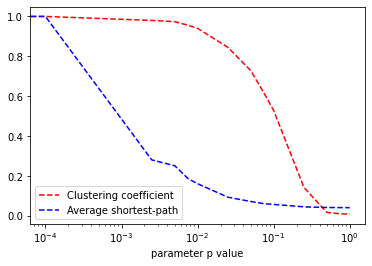

In [15]:
transitivity = []
path = []
for i in range(len(p)):
    watts = Graph.Watts_Strogatz(1,1000,2,p[i])
    transitivity.append(watts.transitivity_undirected())
    path.append(watts.average_path_length())

normalized_transitivity = [t / transitivity[0] for t in transitivity]
normalized_path = [p / path[0] for p in path]

line1, = plt.plot(p ,normalized_transitivity,'r--', label = 'Clustering coefficient')
line2, = plt.plot(p, normalized_path, 'b--', label = 'Average shortest-path')
plt.xscale('log')
plt.xlabel("parameter p value")
plt.legend(handles = [line1, line2] )


### 2. Plot the average shortest-path length as a function of the network size of the ER model.

In [18]:
n= np.arange(500, 15000, 200).tolist()
p = [0]*len(n)
epsilon = 0.05
for i in range(len(n)):
    #p[i] = random.uniform(((1+epsilon) * np.log(n[i]))/n[i],1) trigaba massa, com q si > limit ja es connected millor com més n menys p
    p[i] = ((1+epsilon) * np.log(n[i]))/n[i] + 1/n[i]

In [ ]:
average = []
n_def = []
for i in range(len(n)):
    erdos = Graph.Erdos_Renyi(n[i],p[i])
    if erdos.is_connected(mode='strong'):
        n_def.append(n[i])
        average.append(erdos.average_path_length())

Text(0, 0.5, 'average shortest-path')

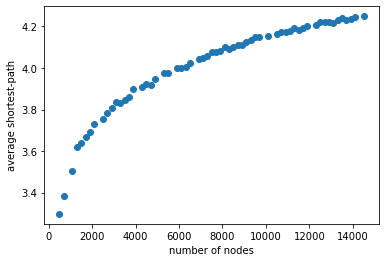

In [21]:
plt.plot(n_def,average, 'o')
plt.xlabel("number of nodes")
plt.ylabel("average shortest-path")

### 3. Plot a histogram of the degree distribution of a BA network. What distribution does this follow? Can you describe it?

pner bonitos graf nom eixos

Text(0, 0.5, 'number of nodes')

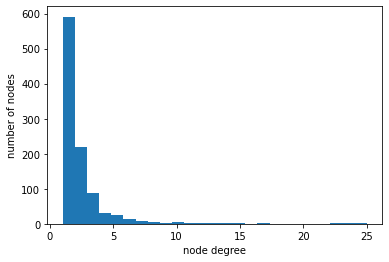

In [58]:
barabasi = Graph.Barabasi(1000,1)
h, b = np.histogram(barabasi.degree(), bins=np.max(barabasi.degree()), density=True)
r = plt.hist(barabasi.degree(), bins=np.max(barabasi.degree()))
plt.xlabel("node degree")
plt.ylabel("number of nodes")

Text(0, 0.5, 'number of nodes')

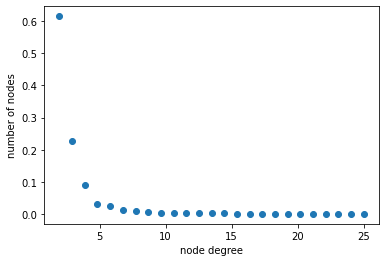

In [59]:
r = plt.plot(b[1:], h, 'o' )
plt.xlabel("node degree")
plt.ylabel("number of nodes")

We print the log plot to check if it follows a power law

Text(0, 0.5, 'number of nodes')

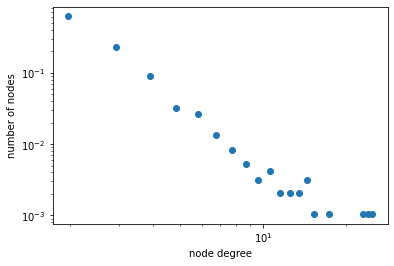

In [60]:
r_log = plt.loglog(b[1:], h, 'o' )
plt.xlabel("node degree")
plt.ylabel("number of nodes")

 We ran into the problem that some of the values in the vector of number of nodes with degree $i$ were 0. Therefore, when calculating the logarithm to be able to do the regression, it gave us infinite values. We have been looking for ways to solve it, in the end we decided to eliminate the samples with 0 and calculate the approximation with the remaining samples. 

In [ ]:
h_new = []
b_new = []
for i in range(len(h)):
    if h[i]!= 0:
        h_new.append(h[i])
        b_new.append(b[1:][i])    

We check that the loglog plot is the same.

Text(0, 0.5, 'number of nodes')

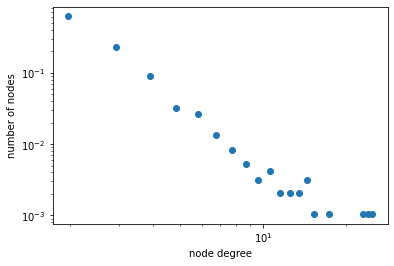

In [65]:
r_log = plt.loglog(b_new, h_new, 'o' )
plt.xlabel("node degree")
plt.ylabel("number of nodes")

Once we know what it follows a power law, we use linear regression to approximate its parameters.

In [66]:
x = pd.DataFrame(b_new)
y = pd.DataFrame(h_new)
x_log = np.log(x)
y_log = np.log(y)

In [ ]:
model = LinearRegression()
model.fit(x_log.values.reshape(-1, 1), y_log.values)
r_sq = model.score(x_log.values.reshape(-1, 1), y_log.values)
a = model.coef_[0]
c = np.exp(model.intercept_)

Degree distribution without 0 and its linear regression aproximation.

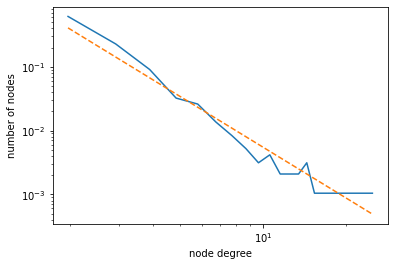

In [85]:
# plot
plt.loglog(b_new, h_new)
plt.loglog(b_new, np.exp(np.log(b_new)*a + model.intercept_), '--')
plt.xlabel("node degree")
plt.ylabel("number of nodes")
plt.show()

Original degree distribution and the linear regression aproximation.

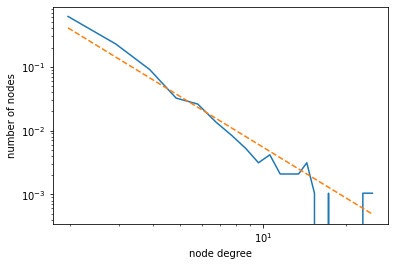

In [86]:
# plot
plt.loglog(b[1:], h)
plt.loglog(b_new, np.exp(np.log(b_new)*a + model.intercept_), '--')
plt.xlabel("node degree")
plt.ylabel("number of nodes")
plt.show()